# Mini project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data 

In [2]:
test_df=pd.read_csv(r"C:\Users\Aniket\Desktop\Internship\Test.csv")
train_df=pd.read_csv(r"C:\Users\Aniket\Desktop\Internship\Train.csv")
# shape of data sets 
print("Shape of test data set:",test_df.shape)
print("Shape of Train data set:",train_df.shape)

Shape of test data set: (5681, 11)
Shape of Train data set: (8523, 12)


In [3]:
df=train_df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# checking null values 

In [5]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
def unique_values(df):
    rows = []
    for column_name in df.columns:
        unique_values = df[column_name].unique()
        num_unique_values = df[column_name].nunique()
        rows.append([column_name, unique_values, num_unique_values])
    
    unique_value = pd.DataFrame(rows, columns=['Columns', 'Unique_Values', 'Number_of_Unique_Values'])
    
    return unique_value


In [7]:
unique_values(df)

,Columns,Unique_Values,Number_of_Unique_Values
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...",415
2,Item_Fat_Content,"[Low Fat, Regular, low fat, LF, reg]",5
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
5,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938
6,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9
8,Outlet_Size,"[Medium, nan, High, Small]",3
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### two colums has null values 
1. Item weight 
2. Outlet size 
#### Item weight could be done with mean value as it is having numerical data  and outlet size can be done with mode value 

In [9]:
print ("number of uniuque values in Item weight :", df['Item_Weight'].nunique())
df['Item_Weight'].dtype

number of uniuque values in Item weight : 415


dtype('float64')

In [10]:
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())
test_df['Item_Weight']= test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
mode_value = df['Outlet_Size'].mode()[0]

In [14]:
df['Outlet_Size'].fillna(mode_value,inplace=True)
test_df['Outlet_Size']=test_df['Outlet_Size'].fillna(mode_value)

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
test_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
unique_values(df)

,Columns,Unique_Values,Number_of_Unique_Values
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",416
2,Item_Fat_Content,"[Low Fat, Regular]",2
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
5,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938
6,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9
8,Outlet_Size,"[Medium, High, Small]",3
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3


# EDA 

In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
unique_values(df)

,Columns,Unique_Values,Number_of_Unique_Values
0,Item_Identifier,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559
1,Item_Weight,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",416
2,Item_Fat_Content,"[Low Fat, Regular]",2
3,Item_Visibility,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880
4,Item_Type,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
5,Item_MRP,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938
6,Outlet_Identifier,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
7,Outlet_Establishment_Year,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9
8,Outlet_Size,"[Medium, High, Small]",3
9,Outlet_Location_Type,"[Tier 1, Tier 3, Tier 2]",3


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Text(0, 0.5, 'Count')

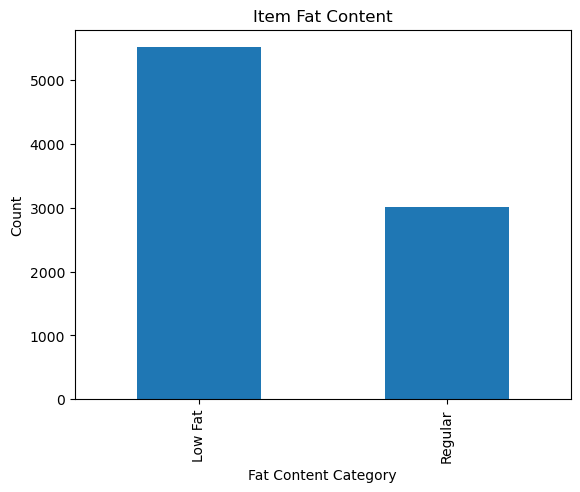

In [22]:
print(df['Item_Fat_Content'].value_counts())
df['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.title('Item Fat Content')
plt.xlabel('Fat Content Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

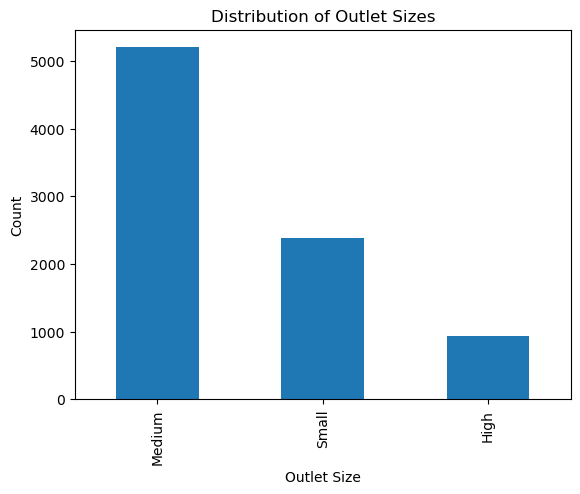

In [23]:
df['Outlet_Size'].value_counts().plot(kind='bar')

plt.title('Distribution of Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Count')

# Models training 

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import xgboost as xgb


# Encoder 

In [25]:
encoder = LabelEncoder()

In [26]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier','Item_Identifier']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

for i in var_mod:
    test_df[i] = le.fit_transform(test_df[i])


In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Scalling using min max scaler 

In [28]:
# Initialize the StandardScaler Item_MRP
scaler = MinMaxScaler()
column=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type', 'Outlet_Identifier', 'Item_Identifier','Item_MRP','Item_Weight','Outlet_Establishment_Year']

In [29]:
# Scale the features in your testing data
df[column]=scaler.fit_transform(df[column])
test_df[column]=scaler.fit_transform(test_df[column])

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.016047,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,3735.1380
1,0.005135,0.081274,1.0,0.019278,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,443.4228
2,0.424904,0.770765,0.0,0.016760,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,2097.2700
3,0.719512,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,732.3800
4,0.832478,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,994.7052


## Spliting the data set 

In [32]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
print(f'shape of feature is :{X.shape}')
print(f'shape of target is :{y.shape}')

shape of feature is :(8523, 11)
shape of target is :(8523,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(f'shape of X_train is :{X_train.shape}')
print(f'shape of X_test is :{X_test.shape}')
print(f'shape of y_train is :{y_train.shape}')
print(f'shape of y_test is :{y_test.shape}')


shape of X_train is :(6818, 11)
shape of X_test is :(1705, 11)
shape of y_train is :(6818,)
shape of y_test is :(1705,)


## Model 1 (LR)

In [38]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = LR.predict(X_test)
# Evaluate the model
r2_LR = r2_score(y_test,y_pred)
mse_LR = mean_squared_error(y_test,y_pred)
mae_LR = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_LR:.2f}')
print(f'Mean Squared Error (MSE): {mse_LR:.2f}')
print(f'Mean Absolute Error (MAE): {mae_LR:.2f}')


R-squared (R2) score: 0.52
Mean Squared Error (MSE): 1411183.58
Mean Absolute Error (MAE): 888.65


# Model 2

In [46]:
rf_model = RandomForestRegressor(max_depth=10,max_features='sqrt', min_samples_leaf=4,min_samples_split=10, n_estimators=200)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [47]:
# make predection on X_test
RF_sales_prediction = rf_model.predict(X_test)
# Evaluate the model
r2_RF = r2_score(y_test, RF_sales_prediction)
mse_RF = mean_squared_error(y_test, RF_sales_prediction)
mae_Rf = mean_absolute_error(y_test, RF_sales_prediction)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_RF:.3f}')
print(f'Mean Squared Error (MSE): {mse_RF:.2f}')
print(f'Mean Absolute Error (MAE): {mae_Rf:.2f}')


R-squared (R2) score: 0.602
Mean Squared Error (MSE): 1180676.16
Mean Absolute Error (MAE): 765.41


## Model 3 (XG Boost)

In [42]:
regressor = XGBRegressor(gamma=0 ,learning_rate=0.1,max_depth=3, min_child_weight=1, n_estimators=100 )
regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
# make predection on X_test
XGBsales_prediction = regressor.predict(X_test)


In [45]:
# Evaluate the model
r2_xgb = r2_score(y_test, XGBsales_prediction)
mse_xgb = mean_squared_error(y_test, XGBsales_prediction)
mae_xgb = mean_absolute_error(y_test, XGBsales_prediction)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_xgb:.2f}')
print(f'Mean Squared Error (MSE): {mse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')

R-squared (R2) score: 0.61
Mean Squared Error (MSE): 1165063.56
Mean Absolute Error (MAE): 758.40


### Results 

In [49]:
# Create a dictionary to store the evaluation metrics
evaluation_metrics = {
    'Model': ['Linear Regression',  'XGBoost', 'Random Forest'],
    'R2 Score': [r2_LR,  r2_xgb, r2_RF, ],
    'Mean Squared Error': [mse_LR,  mse_xgb, mse_RF],
    'Mean Absolute Error': [mae_LR, mae_xgb, mae_Rf]
}
evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Model,R2 Score,Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.524600,1.411184e+06,888.647274
1,XGBoost,0.607513,1.165064e+06,758.398377
2,Random Forest,0.602253,1.180676e+06,765.411857


# XG boost is performing best in all 